# Loading the data

In [21]:
import pandas as pd
import plotly.express as px

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
df = pd.read_csv("/content/2024_spotify_top_100_cleaned.csv")

#Data Exploration

In [24]:
df.shape

(100, 21)

In [25]:
pd.DataFrame(df.columns, columns=["Column Names"])

,Column Names
0,track_id
1,track_name
2,track_artist
3,track_popularity
4,track_album_name
5,track_album_release_year
6,duration_min
7,Genres
8,record_label
9,danceability


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   Genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    object 
 10  energy                    100 non-null    object 
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [27]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,The Weeknd,87,After Hours,2020,3.33,Pop/R&B,Republic Records,51.30%,...,C#,-5.940,Major,5.98%,0.14%,0.01%,8.97%,33.40%,171.00,4
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,85,÷ (Deluxe),2017,3.90,UK Pop,Atlantic Records UK,82.50%,...,C#,-3.183,Minor,8.02%,58.10%,0.00%,9.31%,93.10%,95.98,4
2,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,Lewis Capaldi,86,Divinely Uninspired To A Hellish Extent,2019,3.04,UK Pop,Vertigo Berlin,50.10%,...,C#,-5.679,Major,3.19%,75.10%,0.00%,10.50%,44.60%,109.89,4
3,4Dvkj6JhhA12EX05fT7y2e,As It Was,Harry Styles,87,Harry's House,2022,2.79,Pop,Columbia,52.00%,...,F#,-5.338,Minor,5.57%,34.20%,0.10%,31.10%,66.20%,173.93,4
4,3KkXRkHbMCARz0aVfEt68P,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone,Swae Lee",79,Spider-Man: Into the Spider-Verse (Soundtrack ...,2018,2.63,Rap,Universal Records,76.00%,...,D,-5.574,Major,4.67%,55.20%,0.00%,7.03%,91.30%,89.91,4


#Data cleaning

In [31]:
for feature in ["valence", "danceability", "energy", "acousticness", "instrumentalness", "liveliness", "speechiness"]:
  df[feature] = df[feature].str.replace('%', '').astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  100 non-null    object 
 1   track_name                100 non-null    object 
 2   track_artist              100 non-null    object 
 3   track_popularity          100 non-null    int64  
 4   track_album_name          100 non-null    object 
 5   track_album_release_year  100 non-null    int64  
 6   duration_min              100 non-null    float64
 7   Genres                    100 non-null    object 
 8   record_label              100 non-null    object 
 9   danceability              100 non-null    float64
 10  energy                    100 non-null    float64
 11  key_name                  100 non-null    object 
 12  loudness                  100 non-null    float64
 13  mode                      100 non-null    object 
 14  speechiness

In [33]:
duplicates = df.duplicated()

In [34]:
duplicates.sum()

0

#Musical features Exploration

#Data visualization

In [38]:
sorted_counts = df["Genres"].value_counts().sort_values(ascending=False)
sorted_genres = sorted_counts.index.tolist()

fig = px.bar(df, x="Genres", title="genres Count",
             category_orders={"Genres": sorted_genres})
fig.show()

##Artists

In [41]:
grouped_by_artist = df.groupby("track_artist").count()
grouped_by_artist.sort_values("track_name", ascending=False).head(20)

,track_id,track_name,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,energy,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
track_artist,,,,,,,,,,,,,,,,,,,,
Ed Sheeran,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
The Weeknd,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Bruno Mars,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Dua Lipa,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Imagine Dragons,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Coldplay,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Shawn Mendes,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Olivia Rodrigo,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Sam Smith,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


##Release Year

Which year is predominant in the Top 100 streamed songs?

In [43]:
grouped_by_year = df.groupby("track_album_release_year").count()
grouped_by_year.sort_values("track_album_release_year", ascending=False)

,track_id,track_name,track_artist,track_popularity,track_album_name,duration_min,Genres,record_label,danceability,energy,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
track_album_release_year,,,,,,,,,,,,,,,,,,,,
2023,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2022,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2021,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
2020,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2019,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2018,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2017,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
2016,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2015,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


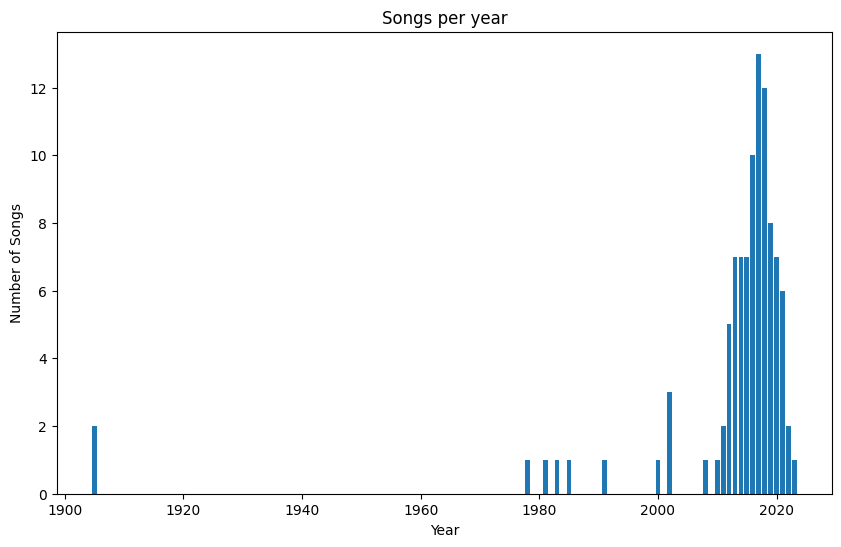

In [48]:
#visualize number of songs (track_name) per year
plt.figure(figsize=(10, 6))
plt.bar(grouped_by_year.index, grouped_by_year['track_name'])
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Songs per year');


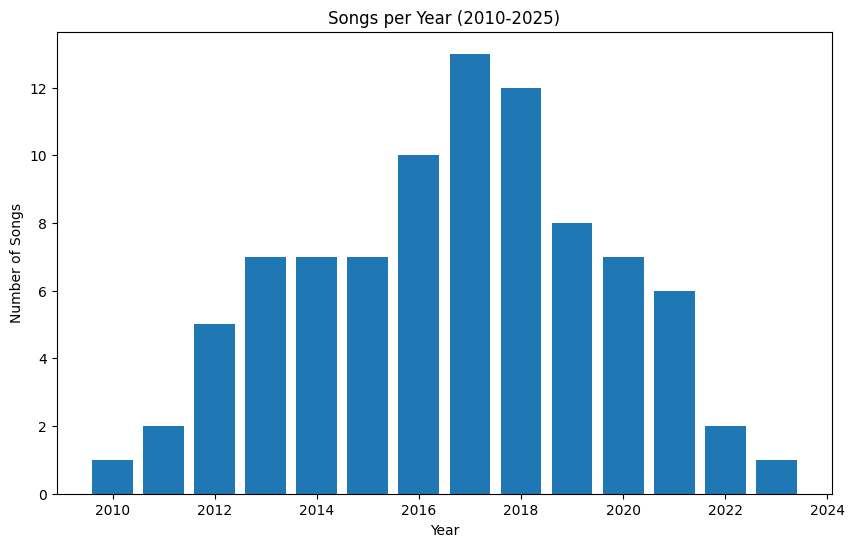

In [51]:
# Filter for the years 2010-2025
filtered_data = grouped_by_year[(grouped_by_year.index >= 2010) & (grouped_by_year.index <= 2025)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_data.index, filtered_data["track_name"])  # Assuming 'track_count' is the column with song counts
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Songs per Year (2010-2025)")
plt.show()

In [52]:
df["track_album_release_year"].min()

1905

In [55]:
df[df["track_album_release_year"] == 1905]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
51,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,85,Hot Fuss,1905,3.72,Rock,Island Records,35.2,...,C#,-5.23,Major,7.47,0.12,0.0,9.95,23.6,148.03,4
77,60a0Rd6pjrkxjPbaKzXjfq,In the End,Linkin Park,87,Hybrid Theory (Bonus Edition),1905,3.61,Rap,Warner Records,55.6,...,D#,-5.87,Minor,5.84,0.96,0.0,20.90,40.0,105.14,4


There might be an error here 😆

In [78]:
#The Killers' Mr. Brightside was actually released in 2004, and Linkin Park's In the End, in 2000. Let's update those rows.

df.loc[df["track_name"] == "Mr. Brightside", "track_album_release_year"] = 2004
df.loc[df["track_name"] == "In the End", "track_album_release_year"] = 2000

In [79]:
df["track_album_release_year"].min()

1978

In [80]:
df[df["track_album_release_year"] == 1978]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
87,5T8EDUDqKcs6OSOwEsfqG7,Don't Stop Me Now - Remastered 2011,Queen,81,Jazz (2011 Remaster),1978,3.49,Rock,EMI,55.9,...,F,-5.276,Major,17.0,4.75,0.02,77.6,60.9,156.3,4


In [53]:
df["track_album_release_year"].max()

2023

In [81]:
df[df["track_album_release_year"] == 2023]

,track_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_year,duration_min,Genres,record_label,danceability,...,key_name,loudness,mode,speechiness,acousticness,instrumentalness,liveliness,valence,tempo,Time Signature
82,7DSAEUvxU8FajXtRloy8M0,Flowers,Miley Cyrus,87,Endless Summer Vacation,2023,3.34,Pop,Columbia,70.6,...,C,-4.775,Major,6.33,5.84,0.01,2.32,63.2,118.05,4


##Popularity

In [57]:
track_popularity = df.groupby("track_name")["track_popularity"].mean()
track_popularity.sort_values(ascending=False).head(20)

,track_popularity
track_name,
I Wanna Be Yours,90.0
Sweater Weather,90.0
Cruel Summer,89.0
Yellow,88.0
The Night We Met,88.0
Flowers,87.0
When I Was Your Man,87.0
In the End,87.0
Locked out of Heaven,87.0


In [58]:
print("Average Track Popularity: ", track_popularity.mean())
print("Median Track Popularity: ", track_popularity.median())
print("Max Track Popularity: ", track_popularity.max())
print("Min Track Popularity: ", track_popularity.min())

Average Track Popularity:  81.04545454545455
Median Track Popularity:  82.0
Max Track Popularity:  90.0
Min Track Popularity:  52.0


##Track Duration

In [61]:
df["duration_min"].mean()

3.7054

In [62]:
df["duration_min"].median()

3.585

In [63]:
df["duration_min"].min()

1.99

In [64]:
df["duration_min"].max()

5.92

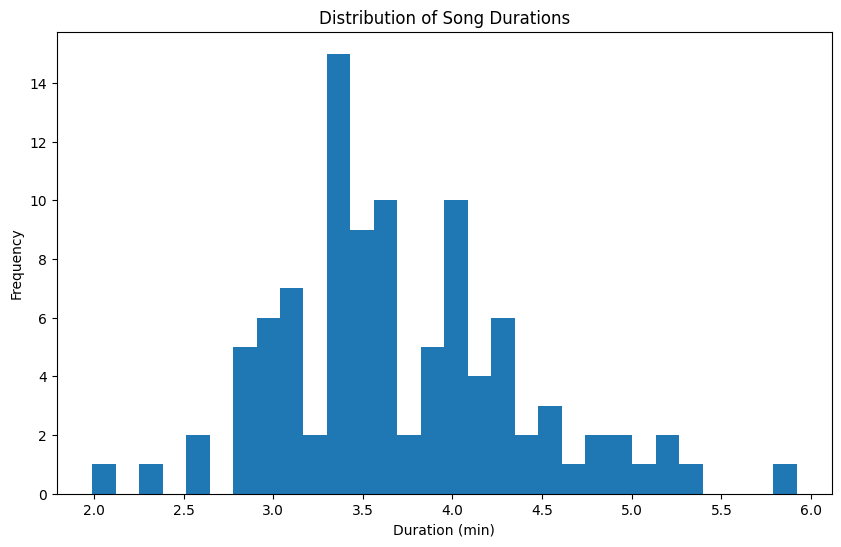

In [65]:
#histogram of duration of songs
plt.figure(figsize=(10, 6))
plt.hist(df['duration_min'], bins=30, color='#1f77b4')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.title('Distribution of Song Durations')
plt.show()

##Music & sonic Features

In [82]:
#In comparison, Obama playlists' average danceability is 63.65% -- almost identical!
round(df["danceability"].mean(),2)

63.81

In [83]:
#In comparison, Obama playlists' average energy is xxx.
round(df["energy"].mean(),2)

62.74

In [84]:
#In comparison, Obama playlists' average energy is -8.2: here, the difference shows there are more "non-commercial" songs in Obama's playlists.
round(df["loudness"].mean(),2)

-6.2

In [85]:
#In comparison, Obama playlists exhibits a slightly happier feeling, with an average valence of 55%.
round(df["valence"].mean(),2)

48.91

In [86]:
round(df["liveliness"].mean(),2)

16.1

In [87]:
round(df["speechiness"].mean(),2)

8.59

In [70]:
#An overwhelming maority of 4/4 songs, which is to be expected with most streamed songs!
df["Time Signature"].value_counts()

,count
Time Signature,
4,98
3,2


In [71]:
df["mode"].value_counts()

,count
mode,
Major,65
Minor,35


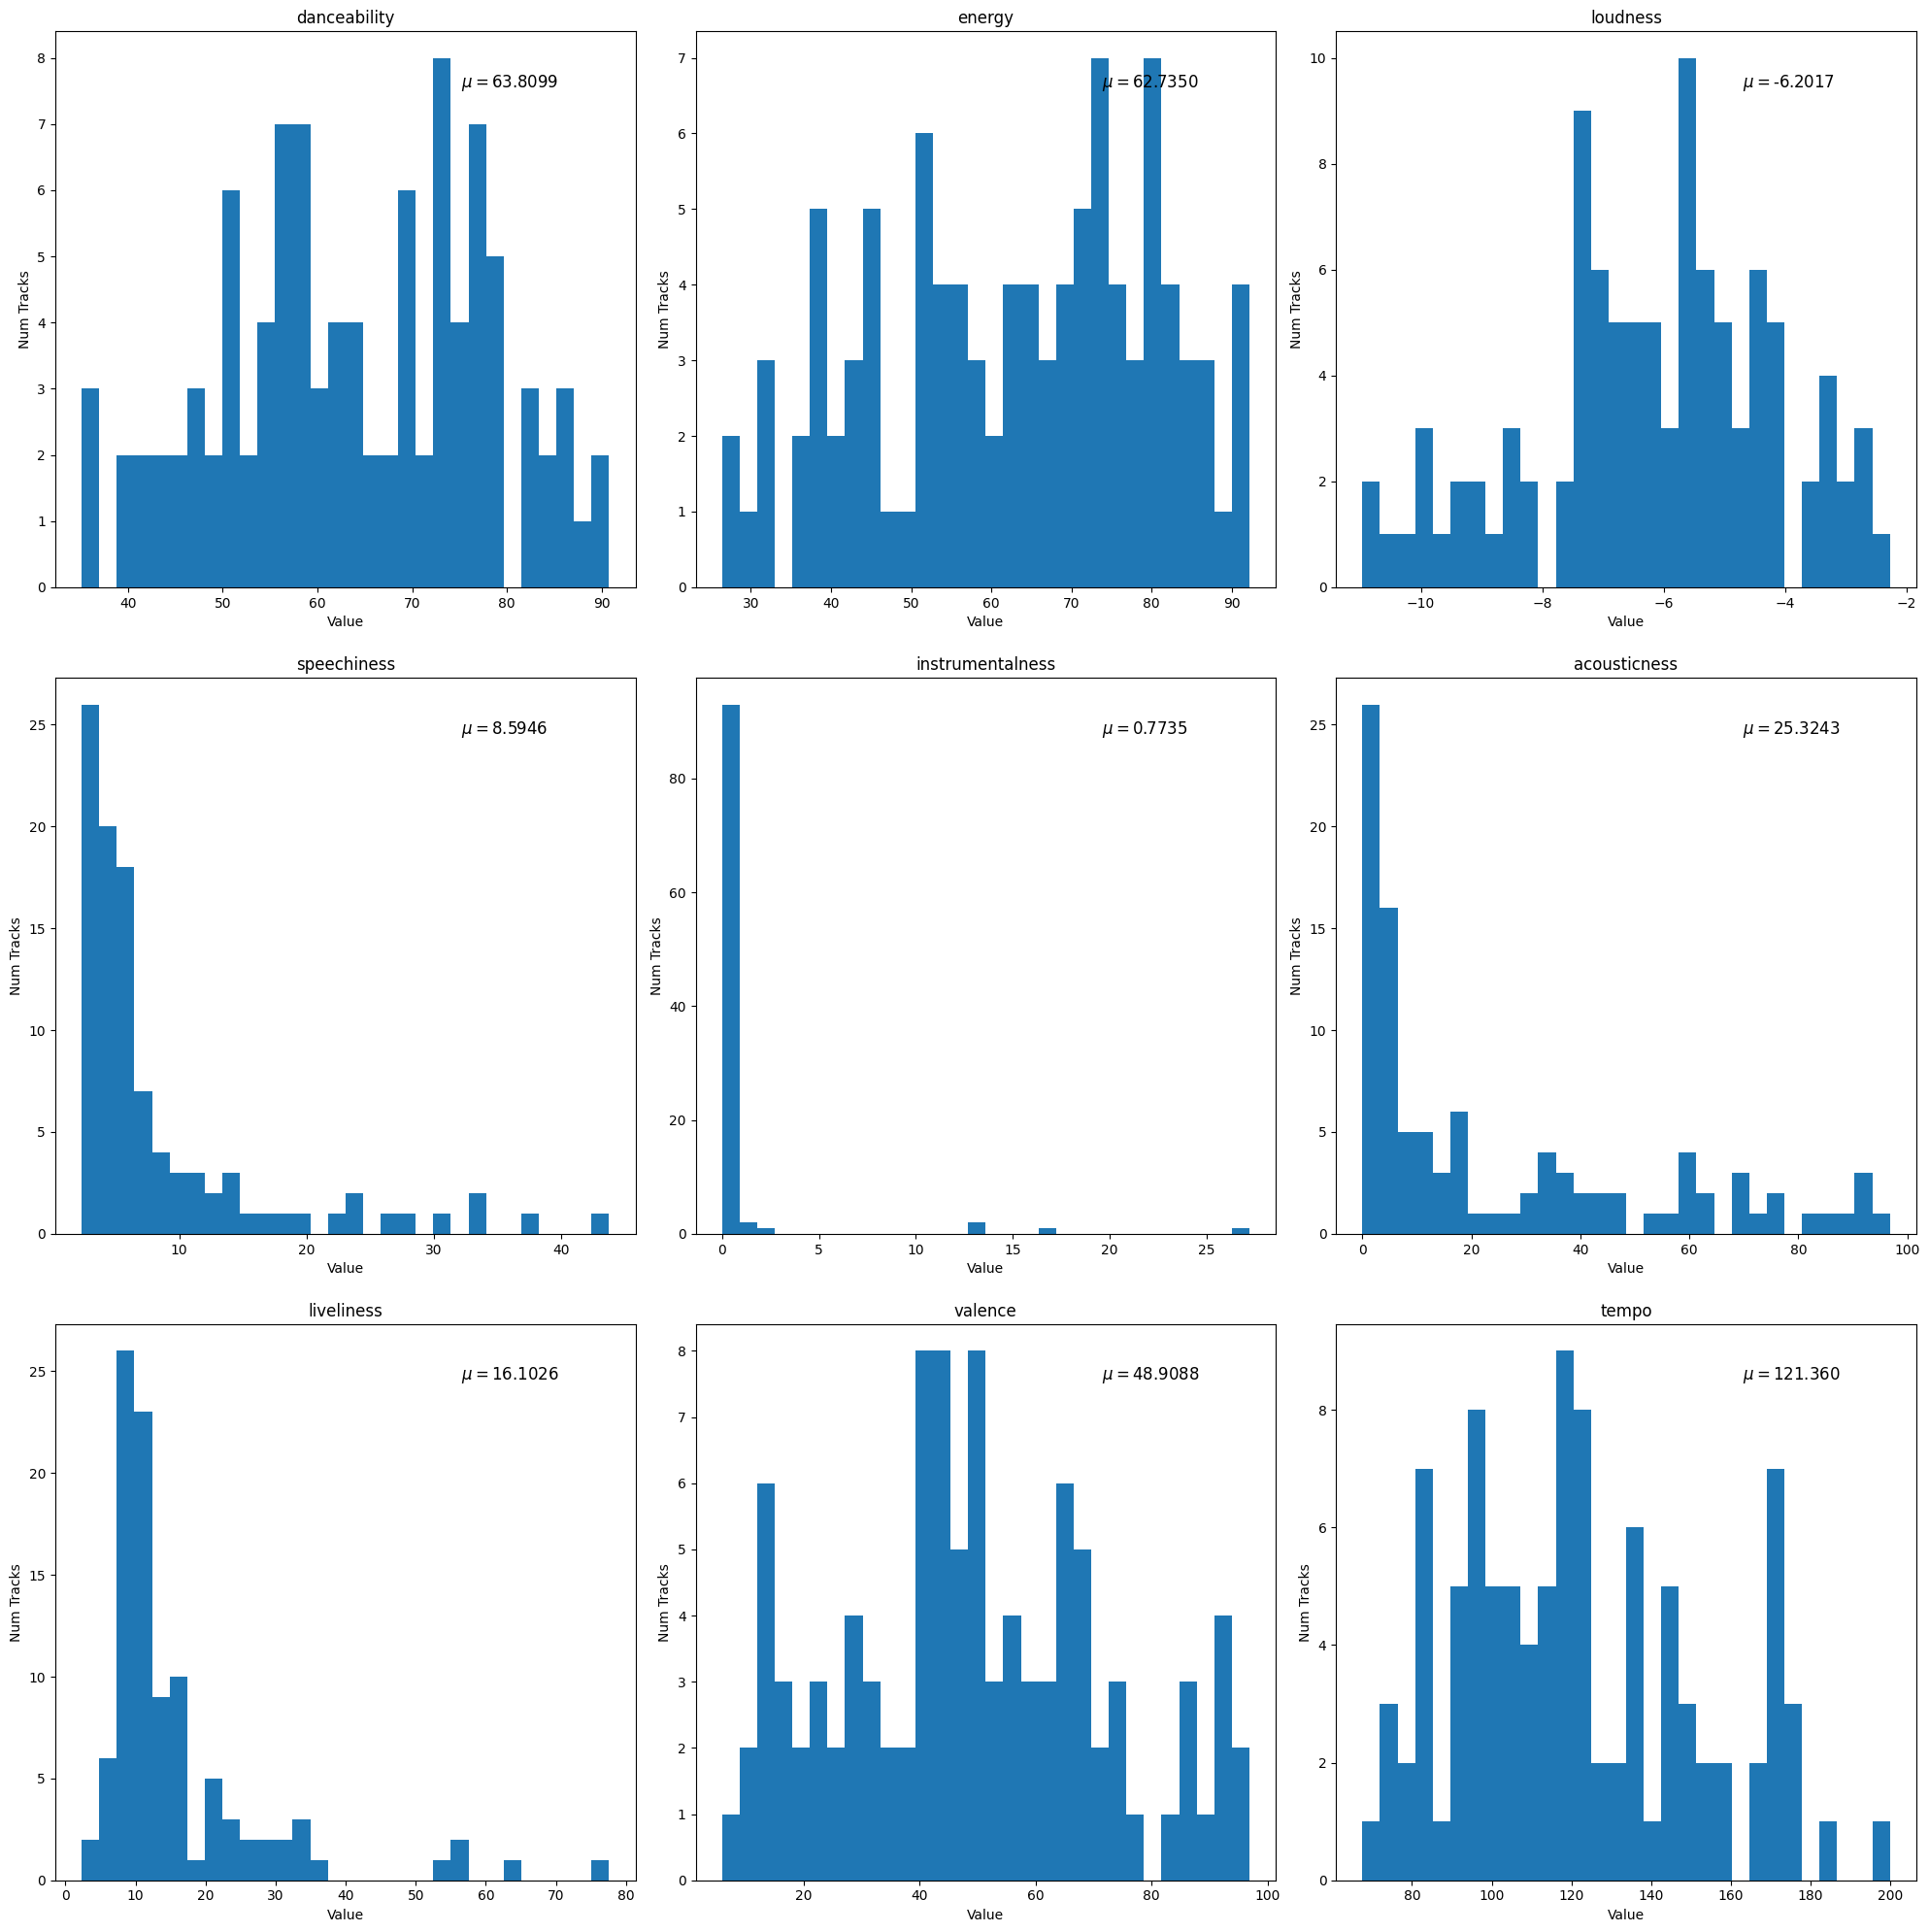

In [73]:
plt.figure(figsize=(20,20))

for i,category in enumerate(['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness', 'liveliness', 'valence', 'tempo']):
    plt.subplot(3, 3, i+1)
    plt.hist(df[category], bins=30)
    plt.text(plt.xlim()[1] - (plt.xlim()[1] - plt.xlim()[0])*0.3,
                plt.ylim()[1]*0.9, r'$\mu=$'+str(df[category].mean())[:7], fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Num Tracks')
    plt.title(category)

plt.tight_layout(h_pad=2)

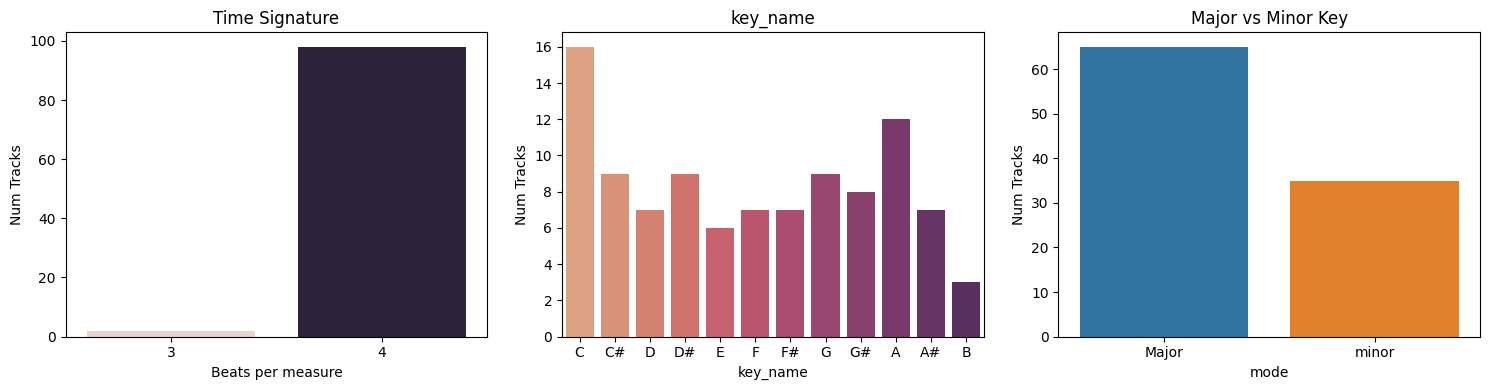

In [76]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.countplot(df, x='Time Signature', hue='Time Signature', legend=False)
plt.xlabel('Beats per measure')
plt.ylabel('Num Tracks')
plt.title('Time Signature')

plt.subplot(1, 3, 2)
sns.countplot(df, x='key_name', hue='key_name', palette='flare', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.ylabel('Num Tracks')
plt.title('key_name')

plt.subplot(1, 3, 3)
sns.countplot(df, x='mode', hue='mode', legend=False)
plt.xticks(ticks=plt.xticks()[0], labels=['Major', 'minor'])
plt.ylabel('Num Tracks')
plt.title('Major vs Minor Key')

plt.tight_layout(w_pad=2)
plt.show()